In [1]:
import requests, os
from dotenv import dotenv_values
from dataclasses import dataclass
from matplotlib import pyplot as plt
import cv2

In [2]:
@dataclass
class Point:
    lon: float
    lat: float

In [3]:
API_KEY = dotenv_values('.env')['API_KEY']
API_ENDPOINT = 'https://graph.mapillary.com/images'

In [4]:
DOWNLOAD_FOLDER='images'
os.makedirs(DOWNLOAD_FOLDER, exist_ok=True)

In [5]:
def query_region(bottom_left, top_right, max_images):
    params = {
        'access_token': API_KEY,
        'bbox': f'{bottom_left.lon},{bottom_left.lat},'+
                f'{top_right.lon},{top_right.lat}',
        'fields': 'id,computed_geometry,thumb_256_url,ca',
        'limit': 20 # max images per request
    }
    
    response = requests.get(API_ENDPOINT, params=params)
    response.raise_for_status()
    data = response.json()
    
    output_paths = []
    
    for i, image in enumerate(data.get('data',[])):
        if i >= max_images:
            break
        
        image_id = image['id']
        lat = image["computed_geometry"]["coordinates"][1]
        lon = image["computed_geometry"]["coordinates"][0]
        heading = image.get("ca", "N/A")
        thumb_url = image["thumb_256_url"]

        # Save thumbnail
        img_data = requests.get(thumb_url).content
        image_output_path = os.path.join(DOWNLOAD_FOLDER, f"{image_id}.jpg")
        with open(image_output_path, "wb") as f:
            f.write(img_data)
        output_paths.append(image_output_path)
    
    return output_paths

Try to download 1 image only:

In [7]:
MINPOINT = Point(-122.276527, 37.803705) # bottom left
MAXPOINT = Point(-122.273598, 37.806504) # top right

downloaded = query_region(MINPOINT, MAXPOINT, 1000)
print(downloaded)

['images/513028209854980.jpg', 'images/1881066002068687.jpg', 'images/1005521353521146.jpg', 'images/2613502365616172.jpg', 'images/805621106738566.jpg', 'images/929043774335010.jpg', 'images/1234744793611238.jpg', 'images/318076143002057.jpg', 'images/464708274639748.jpg', 'images/238860487989023.jpg', 'images/325846765629059.jpg', 'images/381983746312130.jpg', 'images/204543651249633.jpg', 'images/1436421286690304.jpg', 'images/3576165379154064.jpg', 'images/816243815992586.jpg', 'images/141048531366793.jpg', 'images/937626563722966.jpg', 'images/533959804262584.jpg', 'images/143578851111106.jpg']


Display what we downloaded:

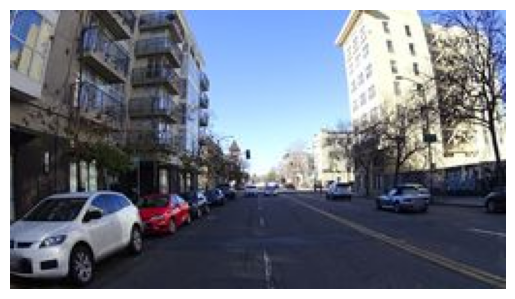

In [8]:
example_image=cv2.imread(filename=downloaded[0])
def display(img):    
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
display(example_image)

### Basic Analysis

Please see [this guide](https://olgarose.github.io/ParkingLot/)

1. Reduce the image information by converting to grayscale

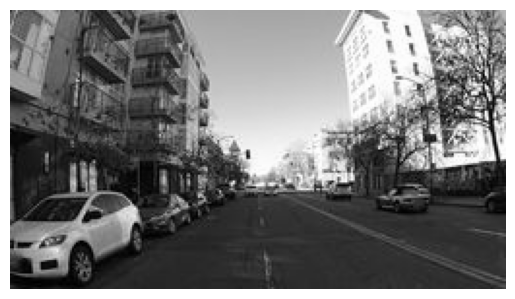

In [9]:
gray = cv2.cvtColor(src=example_image, code=cv2.COLOR_BGR2GRAY)
display(gray)

2. Add some gaussian blur to remove additional unnecessary information

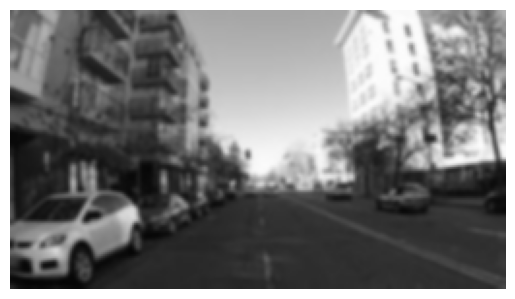

In [10]:
blur_gray = cv2.GaussianBlur(src=gray, ksize=(5, 5), sigmaX=0)
display(blur_gray)

3. Detect lines with Canny

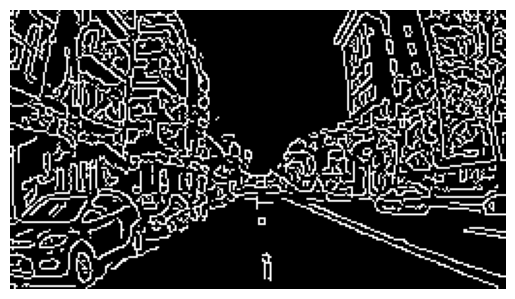

In [12]:
edges = cv2.Canny(image=blur_gray, threshold1=10, threshold2=50, apertureSize=3)
display(edges)